In [1]:
import warnings
warnings.filterwarnings("ignore")

# Need to read in data files
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# Data set locations and paths
trainingPath = "TrainingData/train.p"
testingPath = "TrainingData/test.p"
validationPath = "TrainingData/valid.p"

In [3]:
# Get the data from the data sets using pickle to read them in
with open(trainingPath, mode="rb") as training_data:
    train = pickle.load(training_data)

with open(testingPath, mode="rb") as testing_data:
    test = pickle.load(testing_data)

with open(validationPath, mode="rb") as validation_data:
    valid = pickle.load(validation_data)

In [4]:

# Create the features and labels for the data and link them
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_validation, y_validation = valid['features'], valid['labels']

# Check to see if it imported right as well as the shape for each set
print("X Sahpe", x_train.shape)
print("Y shape", y_train.shape)

X Sahpe (34799, 32, 32, 3)
Y shape (34799,)


In [5]:
# Data prearation
# Shuffle data only the training data
x_train, y_train = shuffle(x_train, y_train)

In [6]:
# Turn to gray images
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

In [7]:
# Normalize the images
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [8]:
# Check the shape of the gray
print("X Gray Shape", x_train.shape)


X Gray Shape (34799, 32, 32, 3)


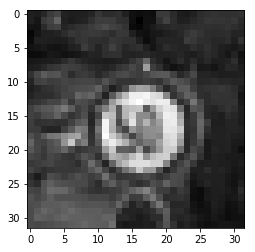

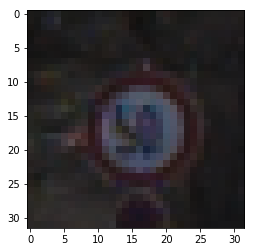

In [9]:
# Check to see if graying worked
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])

In [10]:
# Model Training
# Define Image Shape
image_shape = x_train_gray[i].shape

In [11]:
# Create a sequential model
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 43, activation = 'sigmoid'))

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [12]:
history = cnn_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 5s 142us/step - loss: 3.2902 - acc: 0.0663 - val_loss: 3.2566 - val_acc: 0.0737
Epoch 2/50
34799/34799 [==============================] - 1s 33us/step - loss: 2.1210 - acc: 0.3999 - val_loss: 1.9598 - val_acc: 0.4991
Epoch 3/50
34799/34799 [==============================] - 1s 33us/step - loss: 1.2503 - acc: 0.6810 - val_loss: 1.5464 - val_acc: 0.5696
Epoch 4/50
34799/34799 [==============================] - 1s 34us/step - loss: 0.9280 - acc: 0.7718 - val_loss: 1.2731 - val_acc: 0.6603
Epoch 5/50
34799/34799 [==============================] - 1s 33us/step - loss: 0.7448 - acc: 0.8220 - val_loss: 1.0997 - val_acc: 0.7086
Epoch 6/50
34799/34799 [==============================] - 1s 33us/step - loss: 0.6240 - acc: 0.8546 - val_loss: 0.9986 - val_acc: 0.7385
Epoch 7/50
34799/34799 [==============================] - 1s 34us/step - loss: 0.5325 - acc: 0.8795 - val_loss: 0.9085 - val_acc

In [13]:
score = cnn_model.evaluate(x_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8660


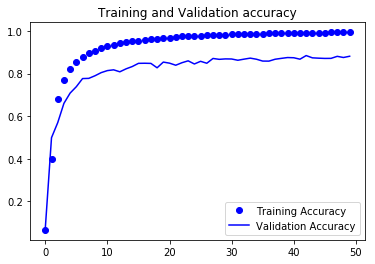

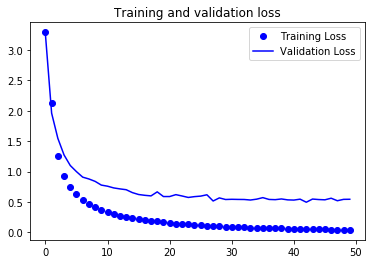

In [14]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
#get the predictions for the test data
print(x_test_gray_norm.shape)
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
#get the indices to be plotted
y_true = y_test

cm = confusion_matrix(y_true, predicted_classes)

(12630, 32, 32, 1)


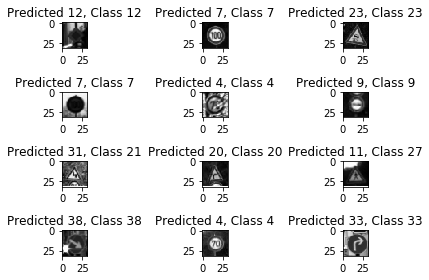

In [26]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()